In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf

In [3]:
import os 
import pandas as pd 
import numpy as np

In [4]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)) :
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [6]:
train = pd.DataFrame()
train['image'],train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [15]:
print(train)

                                      image     label
0         train\angry\Training_10118481.jpg     angry
1         train\angry\Training_10120469.jpg     angry
2         train\angry\Training_10131352.jpg     angry
3         train\angry\Training_10161559.jpg     angry
4          train\angry\Training_1021836.jpg     angry
...                                     ...       ...
28704  train\surprise\Training_99916297.jpg  surprise
28705  train\surprise\Training_99924420.jpg  surprise
28706  train\surprise\Training_99937001.jpg  surprise
28707  train\surprise\Training_99951755.jpg  surprise
28708  train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'],test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(test)

                                      image     label
0       test\angry\PrivateTest_10131363.jpg     angry
1       test\angry\PrivateTest_10304478.jpg     angry
2        test\angry\PrivateTest_1054527.jpg     angry
3       test\angry\PrivateTest_10590091.jpg     angry
4        test\angry\PrivateTest_1109992.jpg     angry
...                                     ...       ...
7173  test\surprise\PublicTest_98089595.jpg  surprise
7174  test\surprise\PublicTest_98567249.jpg  surprise
7175  test\surprise\PublicTest_98972870.jpg  surprise
7176  test\surprise\PublicTest_99242645.jpg  surprise
7177  test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]


In [10]:
print(test)
print(test['image'])

                                      image     label
0       test\angry\PrivateTest_10131363.jpg     angry
1       test\angry\PrivateTest_10304478.jpg     angry
2        test\angry\PrivateTest_1054527.jpg     angry
3       test\angry\PrivateTest_10590091.jpg     angry
4        test\angry\PrivateTest_1109992.jpg     angry
...                                     ...       ...
7173  test\surprise\PublicTest_98089595.jpg  surprise
7174  test\surprise\PublicTest_98567249.jpg  surprise
7175  test\surprise\PublicTest_98972870.jpg  surprise
7176  test\surprise\PublicTest_99242645.jpg  surprise
7177  test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         test\angry\PrivateTest_10131363.jpg
1         test\angry\PrivateTest_10304478.jpg
2          test\angry\PrivateTest_1054527.jpg
3         test\angry\PrivateTest_10590091.jpg
4          test\angry\PrivateTest_1109992.jpg
                        ...                  
7173    test\surprise\PublicTest_98089595.jpg
7174 

In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
datagen = ImageDataGenerator(
    # ...
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    zca_epsilon=1e-06
)

c:\Users\ashmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [11]:
from tqdm import tqdm

In [24]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [26]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]c:\Users\ashmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 28709/28709 [03:34<00:00, 133.57it/s]


In [27]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:52<00:00, 136.40it/s]


In [18]:
from keras_preprocessing.image.utils import load_img

In [28]:
from PIL import Image

In [29]:
import cv2
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image_path in tqdm(images, desc="Extracting Features"):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        features.append(img)
    return features

In [30]:
import numpy as np

In [31]:
train_features = np.array(train_features)
test_features = np.array(test_features)

In [32]:
x_train = train_features/255.0
x_test = test_features/255.0

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [35]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [36]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [37]:
x_train[10]

array([[[0.77647059],
        [0.81176471],
        [0.82745098],
        ...,
        [0.77254902],
        [0.69803922],
        [0.90588235]],

       [[0.76078431],
        [0.82352941],
        [0.80784314],
        ...,
        [0.81176471],
        [0.68235294],
        [0.80392157]],

       [[0.80392157],
        [0.84705882],
        [0.82352941],
        ...,
        [0.81176471],
        [0.73333333],
        [0.68235294]],

       ...,

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.5372549 ],
        [0.58823529],
        [0.50588235]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.51372549],
        [0.55294118],
        [0.54901961]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.53333333],
        [0.50588235],
        [0.57254902]]])

# Model Building

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential()
# Convolutional layer
model.add(Conv2D(128,kernel_size=(3,3), activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

opt = Adam(lr= 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics='accuracy')

In [29]:
model.fit(x= x_train,y = y_train,batch_size= 128,epochs=100, validation_data=(x_test, y_test))

Epoch 1/100



225/225 [==============================] - 112s 488ms/step - loss: 1.8233 - accuracy: 0.2463 - val_loss: 1.8142 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 108s 479ms/step - loss: 1.8028 - accuracy: 0.2534 - val_loss: 1.7718 - val_accuracy: 0.2544
Epoch 3/100
225/225 [==============================] - 108s 479ms/step - loss: 1.7254 - accuracy: 0.2926 - val_loss: 1.6458 - val_accuracy: 0.3376
Epoch 4/100
225/225 [==============================] - 107s 475ms/step - loss: 1.6144 - accuracy: 0.3587 - val_loss: 1.4879 - val_accuracy: 0.4184
Epoch 5/100
225/225 [==============================] - 113s 501ms/step - loss: 1.5068 - accuracy: 0.4151 - val_loss: 1.3727 - val_accuracy: 0.4751
Epoch 6/100
225/225 [==============================] - 121s 539ms/step - loss: 1.4415 - accuracy: 0.4441 - val_loss: 1.3415 - val_accuracy: 0.4763
Epoch 7/100
225/225 [==============================] - 122s 544ms/step - loss: 1.4027 - accuracy: 0.4617 - val_loss: 1.3006 - val_

In [36]:
model.fit(x= x_train,y = y_train,batch_size= 128,epochs=100, validation_data=(x_test, y_test))

Epoch 1/100



225/225 [==============================] - 116s 508ms/step - loss: 1.8227 - accuracy: 0.2473 - val_loss: 1.8177 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 109s 483ms/step - loss: 1.8017 - accuracy: 0.2537 - val_loss: 1.7771 - val_accuracy: 0.2523
Epoch 3/100
225/225 [==============================] - 119s 529ms/step - loss: 1.7271 - accuracy: 0.2911 - val_loss: 1.6460 - val_accuracy: 0.3461
Epoch 4/100
225/225 [==============================] - 117s 522ms/step - loss: 1.6172 - accuracy: 0.3579 - val_loss: 1.4963 - val_accuracy: 0.4164
Epoch 5/100
225/225 [==============================] - 116s 516ms/step - loss: 1.5130 - accuracy: 0.4141 - val_loss: 1.3980 - val_accuracy: 0.4570
Epoch 6/100
225/225 [==============================] - 97s 433ms/step - loss: 1.4443 - accuracy: 0.4430 - val_loss: 1.3373 - val_accuracy: 0.4742
Epoch 7/100
225/225 [==============================] - 96s 429ms/step - loss: 1.3990 - accuracy: 0.4629 - val_loss: 1.2815 - val_ac

In [30]:
from keras.models import model_from_json

In [40]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

# predicting a model

In [38]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [41]:
image = 'train/sad/Training_400788.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 31ms/step
model prediction is  sad


In [42]:
import matplotlib.pyplot as plot

original image is of sad
1/1 [==============================] - 0s 35ms/step
model prediction is  sad


c:\Users\ashmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


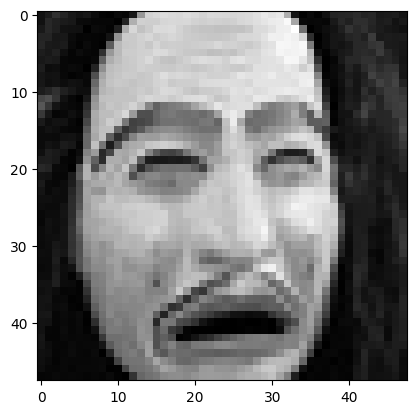

In [43]:
image = 'train/sad/Training_468124.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plot.imshow(img.reshape(48,48),cmap='gray')

In [44]:
image = 'train/surprise/Training_353184.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of surprise
1/1 [==============================] - 0s 24ms/step
model prediction is  surprise


In [45]:
image = 'train/disgust/Training_5459858.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of disgust
1/1 [==============================] - 0s 21ms/step
model prediction is  disgust


original image is of angry
1/1 [==============================] - 0s 20ms/step
model prediction is  angry


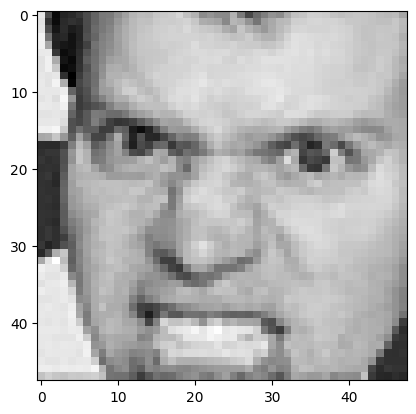

In [64]:
image = 'train/angry/Training_1329550.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plot.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 [==============================] - 0s 25ms/step
model prediction is  neutral


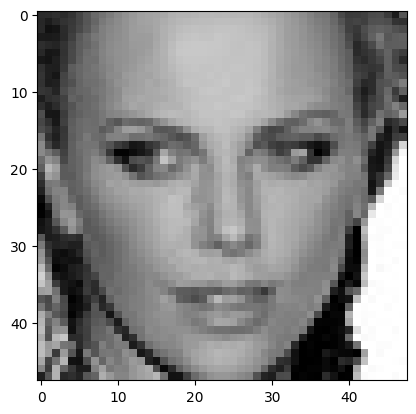

In [46]:
image = 'train/neutral/Training_431269.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plot.imshow(img.reshape(48,48),cmap='gray')

In [47]:
image = 'train/fear/Training_545062.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of fear
1/1 [==============================] - 0s 22ms/step
model prediction is  fear


In [48]:
import matplotlib.pyplot as plot
%matplotlib inline

original image is of fear
1/1 [==============================] - 0s 10ms/step
model prediction is  fear


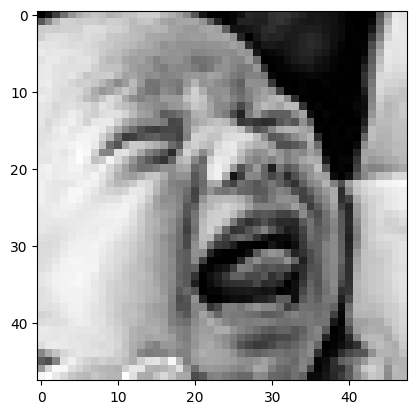

In [62]:
image = 'train/fear/Training_545062.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plot.imshow(img.reshape(48,48),cmap='gray')

# Fitting the model

In [31]:
from keras.models import model_from_json

In [32]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)   
model.save("model.h5")

c:\Users\ashmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
(test_image, train_label), (test_image, test_label) = tf.keras.datasets.mnist.load_data()

In [34]:
import tensorflow as tf

In [35]:
model= tf.keras.models.load_model("model.h5") 

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Make predictions on the test set
y_pred = model.predict(x_test)

225/225 [==============================] - 8s 37ms/step


In [39]:
# Convert one-hot encoded labels back to original labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

In [40]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

In [41]:
# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 957    1    0    0    0    0    0]
 [ 111    0    0    0    0    0    0]
 [1024    0    0    0    0    0    0]
 [1773    1    0    0    0    0    0]
 [1232    1    0    0    0    0    0]
 [1245    2    0    0    0    0    0]
 [ 831    0    0    0    0    0    0]]
